Fixing CircularCenterELlipseIntersection just to get it to work properly. 
Adding another circular center ellipse. 

Mira

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFun import *
from random import uniform

In [2]:
r = int(100)
origin = [0,250,0] #(x0,y0,z0)
L = int(300)
coeffellipse = [263.9,256,64.15]
theta = np.pi/2
specnum = 1000
xrange = 23.07

xi,yi,zi,xr,yr,zr,xp,yp,zp, pointints, vect = reflect_specORIGINellipsePOINT(coeffellipse,r,origin,L, theta, specnum, xrange, 'pos')

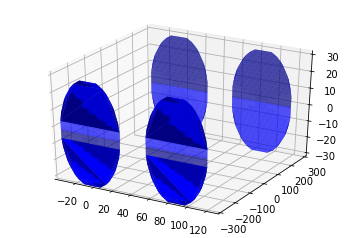

In [3]:
origin1 = [0,0] #x,y
origin2 = [90,0] #x,y
origin3 = [0,64]
origin4 = [90,64] #x,y 
coeffellipse = [263.9,256,64.15] 
#Centered around x-axis, not shifted, 
X1,Y1,Z1,X2,Y2,Z2 = FTSCEllipsoid(50,np.pi/8, coeffellipse, 64.15, origin1, 'pos')
X3,Y3,Z3,X4,Y4,Z4 = FTSCEllipsoid(50,np.pi/8, coeffellipse, 64.15, origin2, 'pos')
X52,Y52,Z52,X62,Y62,Z62 = FTSCEllipsoid(50,np.pi/8, coeffellipse, 64.15, origin3, 'neg')
X72,Y72,Z72,X82,Y82,Z82 = FTSCEllipsoid(50,np.pi/8, coeffellipse, 64.15, origin4, 'neg')
Xset, Yset, Zset = setrange2d(32.07, X1,Y1,Z1, origin1)
Xset2, Yset2, Zset2 = setrange2d(32.07, X2, Y2, Z2, origin1)
Xset3, Yset3, Zset3 = setrange2d(32.07, X3,Y3,Z3, origin2)
Xset4, Yset4, Zset4 = setrange2d(32.07, X4, Y4, Z4, origin2)
Xset5, Yset5, Zset5 = setrange2d(32.07, X52,Y52,Z52, origin3)
Xset6, Yset6, Zset6 = setrange2d(32.07, X62, Y62, Z62, origin3)
Xset7, Yset7, Zset7 = setrange2d(32.07, X72,Y72,Z72, origin4)
Xset8, Yset8, Zset8 = setrange2d(32.07, X82, Y82, Z82, origin4)

pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(Xset,Yset,Zset, linewidth = .2, antialiased=True, color = 'blue')
pl3dsurf.plot_trisurf(Xset2,Yset2,Zset2, linewidth = .2, antialiased=True, color = 'blue')
pl3dsurf.plot_trisurf(Xset3,Yset3,Zset3, linewidth = .2, antialiased=True, color = 'blue')
pl3dsurf.plot_trisurf(Xset4,Yset4,Zset4, linewidth = .2, antialiased=True, color = 'blue')
pl3dsurf.plot_trisurf(Xset5,Yset5,Zset5, linewidth = .2, antialiased=True, color = 'blue')
pl3dsurf.plot_trisurf(Xset6,Yset6,Zset6, linewidth = .2, antialiased=True, color = 'blue')
pl3dsurf.plot_trisurf(Xset7,Yset7,Zset7, linewidth = .2, antialiased=True, color = 'blue')
pl3dsurf.plot_trisurf(Xset8,Yset8,Zset8, linewidth = .2, antialiased=True, color = 'blue')
pl3dsurf.set_ylim([-300,300])
pl.show()

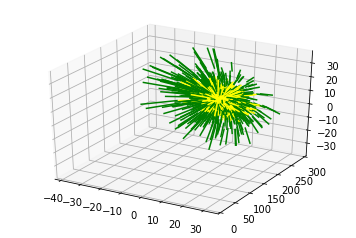

In [4]:
pl3dsurf = pl.figure().gca(projection = '3d')
#pl3dsurf.plot_trisurf(Xset,Yset,Zset, linewidth = .2, antialiased=True, color = 'blue')
#pl3dsurf.plot_trisurf(Xset2,Yset2,Zset2, linewidth = .2, antialiased=True, color = 'blue')
for n in range (0,len(xi)):
    #pl3dsurf.scatter(pointints[n][0], pointints[n][1], pointints[n][2], color = 'black')
    pl3dsurf.plot(xi[n],yi[n],zi[n], color = 'yellow') #intial
    pl3dsurf.plot(xr[n],yr[n],zr[n], color = 'green') #reflected
pl3dsurf.set_ylim([0,300])
#pl3dsurf.set_zlim([0,30])
#pl3dsurf.set_xlim([0,30])
pl.show()
#DOES VECTL2 WORK FPR  

In [5]:
#GIVEN ellipse, point, length
def reflectellipsePOINT1(coeffellipse,r,v,p): #p = origin is origin of source! (for correct length)
    c = tangcoef(p,v,coeffellipse) #plane coefficients
    VectL = v #incident vector#defining points of incident vector
    #VectLinit = [-a for a in v]
    VectLinit = v
    VectLNorm = norm(v) #incident unit vector
    dU, N = plane_info(c,r) #gradient and normal of plane
    #reflected ray
    #VectL2n = VectLNorm + 2*N #reflected vector
    VectL2 = VectLNorm - 2*N #IS IT PLUS OR MINUS
    VectLNorm2 = norm(VectL2) #reflected unit vector
    xp,yp,zp = make_plane(c,r) #plane
    xint,yint,zint = ellipselineint(p,v,coeffellipse)
    #pointintRETURN = [xint,yint,zint]
    pointint = [float(xint[0]),float(yint[0]),float(zint[0])] #array and points of intersection
    pointintneg = [float(xint[1]),float(yint[1]),float(zint[1])] #array and points of intersection
    L1 = np.sqrt((pointint[0] - p[0])**2 + (pointint[1] - p[1])**2 + (pointint[2] - p[2])**2)
    L1neg = np.sqrt((pointintneg[0] - p[0])**2 + (pointintneg[1] - p[1])**2 + (pointintneg[2] - p[2])**2)
    xi,yi,zi = make_line(p,VectLinit,L1) #incident line from intersection point
    xr,yr,zr = make_line(pointint,VectL2,L1)
    xin,yin,zin = make_line(p,VectLinit,L1neg) #incident line from intersection point
    xrn,yrn,zrn = make_line(pointintneg,VectL2,L1neg)
    return xi,yi,zi,xr,yr,zr,xp,yp,zp,xin,yin,zin,xrn,yrn,zrn, pointint, pointintneg, VectL2
#origin is origin of source
def reflect_specellipsePOINT(coeffellipse,r,pointints,vectors, xrange, sign):
    xi = []
    yi = []
    zi = []
    xr = []
    yr = []
    zr = []
    xp = []
    yp = []
    zp = []
    vect = []
    vectors = np.array(vectors)
    origins = np.array(pointints)
    for i in range (0, len(vectors)):
        Vi = vectors[i]
        origin = origins[i]
        xiL,yiL,ziL,xrL,yrL,zrL,xpL,ypL,zpL,xinL,yinL,zinL,xrnL,yrnL,zrnL, pointint, pointintneg, vectL2 = reflectellipsePOINT1(coeffellipse,r,Vi,origin)
        if setrange3dind(xrange, pointint[0], pointint[1], pointint[2], setorigin, sign) == True: 
            xi.append(xiL)
            yi.append(yiL)
            zi.append(ziL)
            xr.append(xrL)
            yr.append(yrL)
            zr.append(zrL)
            xp.append(xpL)
            yp.append(ypL)
            zp.append(zpL)
            pointints.append(pointint) 
            vect.append(vectL2)
        if setrange3dind(xrange, pointintneg[0], pointintneg[1], pointintneg[2], origin, sign) == True:
            xi.append(xinL)
            yi.append(yinL)
            zi.append(zinL)
            xr.append(xrnL)
            yr.append(yrnL)
            zr.append(zrnL)
            xp.append(xpL)
            yp.append(ypL)
            zp.append(zpL)
            pointints.append(pointintneg)
            vect.append(vectL2)
    return xi,yi,zi,xr,yr,zr,xp,yp,zp, pointints, vect

Vi = vect[375]
r = int(100)
origin = [0,250,0] #(x0,y0,z0)
L = int(300)
coeffellipse = [263.9,256,64.15]
theta = np.pi/2
specnum = 1000
xrange = 23.07
xiL,yiL,ziL,xrL,yrL,zrL,xpL,ypL,zpL,xinL,yinL,zinL,xrnL,yrnL,zrnL, pointint, pointintneg, vectL2 = reflectellipsePOINT1(coeffellipse,r,Vi,origin)

pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot(xiL, yiL, ziL)
pl.show()



tryi = []
Bi = []
for i in range (0, len(vect)):
    if np.abs(vect[i][2]) <= 4.64772310e-03: 
        tryi.append(vect[i][2])
        Bi.append(i)
#a = [ -3.35982180e-01,   9.41868228e-01,  -4.64772310e-04]
#int(a[0])
print(tryi)
print(Bi)
print(vect[375])

xi2,yi2,zi2,xr2,yr2,zr2,xp2,yp2,zp2, pointints2, vect2 = reflect_specellipsePOINT1(coeffellipse,r,pointints, vect, xrange, 'neg')


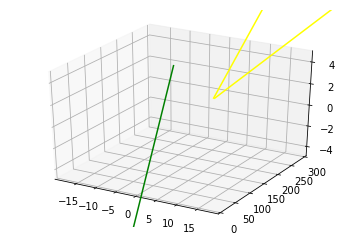

In [8]:
pl3dsurf = pl.figure().gca(projection = '3d')
#pl3dsurf.plot_trisurf(Xset,Yset,Zset, linewidth = .2, antialiased=True, color = 'blue')
#pl3dsurf.plot_trisurf(Xset2,Yset2,Zset2, linewidth = .2, antialiased=True, color = 'blue')
for n in range (0,len(xi2)):
    #pl3dsurf.scatter(pointints[n][0], pointints[n][1], pointints[n][2], color = 'black')
    pl3dsurf.plot(xi2[n],yi2[n],zi2[n], color = 'yellow') #intial
    pl3dsurf.plot(xr2[n],yr2[n],zr2[n], color = 'green') #reflected
pl3dsurf.set_ylim([0,300])
#pl3dsurf.set_zlim([0,30])
#pl3dsurf.set_xlim([0,30])
pl.show()